You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/150
24/24 [==============================] - 1s 9ms/step - loss: 1451.7455 - r2_keras: -4.4608 - val_loss: 1378.1121 - val_r2_keras: -4.9488
Epoch 2/150
24/24 [==============================] - 0s 3ms/step - loss: 1223.1376 - r2_keras: -3.4990 - val_loss: 1075.7699 - val_r2_keras: -3.6404
Epoch 3/150
24/24 [==============================] - 0s 3ms/step - loss: 864.9728 - r2_keras: -2.1645 - val_loss: 660.6487 - val_r2_keras: -1.8462
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 469.1975 - r2_keras: -0.6382 - val_loss: 314.6090 - val_r2_keras: -0.3516
Epoch 5/150
24/24 [==============================] - 0s 3ms/step - loss: 258.6099 - r2_keras: 0.0715 - val_loss: 201.8525 - val_r2_keras: 0.1359
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 221.2865 - r2_keras: 0.1999 - val_loss: 1

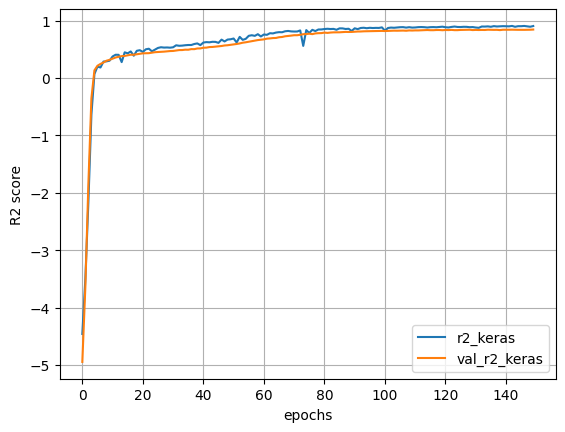

7/7 [==============================] - 0s 2ms/step - loss: 40.6836 - r2_keras: 0.8332
Test Loss: 40.683590, Test R2 Score: 0.833166


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Read the dataset
df = pd.read_csv('C:/Users/rshiv/Documents/python ml/practice/Concrete_Data.csv')

# Display the first five entries
df.head()

# Separate features and target variable
X = df.drop('strength', axis='columns')
y = df.strength

# Check for missing values
df.isnull().sum()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Reshape target variables
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Create the network using Functional API
input_ = keras.layers.Input(shape=X_train_std.shape[1:])
x = keras.layers.Dense(units=100, activation='relu')(input_)
x = keras.layers.Dense(units=50, activation='relu')(x)
output_ = keras.layers.Dense(units=1, activation='linear')(x)

model_DNN = keras.Model(inputs=[input_], outputs=[output_])

# Plot the model architecture
tf.keras.utils.plot_model(
    model_DNN,
    to_file='model_DNN.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

# Custom R2-score metrics for Keras backend
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

# Compile the model
model_DNN.compile(loss='mse', optimizer='adam', metrics=[r2_keras])

# Train the model
history_DNN = model_DNN.fit(
    x=X_train_std, y=y_train,
    epochs=150,
    validation_split=0.1,
    batch_size=32
)

# Plot the training progress
keys = ['r2_keras', 'val_r2_keras']
progress = {k: v for k, v in history_DNN.history.items() if k in keys}
pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("R2 score")
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_loss, test_r2_score = model_DNN.evaluate(X_test_std, y_test)
print("Test Loss: %f, Test R2 Score: %f" % (test_loss, test_r2_score))
